# Pandas

## Lectura de archivos

- Pandas es una librería orientada a la manipulación de estructuras de datos, ingesta de datos en múltiples formatos.
- La convención sugiere importar pandas de la siguiente manera: `import pandas as pd`

In [1]:
# Forma estándar de importar el módulo pandas
import pandas as pd

- Existen varias funciones para cargar datos, dependiendo del formato en el que estos se encuentran. La más usual, y que usaremos en la mayoría de los casos del curso, es `pd.read_csv()`, que permite cargar archivos en formato `csv`.
- Existen dos estructuras de datos básicas de pandas: `DataFrame` y `Series`

In [2]:
# Carga de un archivo csv para ser almacenado en la estructura de tipo DataFrame
df = pd.read_csv('alumnos.csv')

# 'df' es una instancia de la clase (por tanto, un objeto) DataFrame
# Posee el atributo 'shape' que almacena las dimensiones de los datos en una tupla de 2 valores, donde la primera corresponde a la cantidad de filas, y la segunda a la cantidad de columnas
print(f"La variable 'df' es de tipo {type(df)}, y tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

La variable 'df' es de tipo <class 'pandas.core.frame.DataFrame'>, y tiene 21 filas y 5 columnas.


## DataFrame
- Es una representación de una matriz de datos ordenados por filas y columnas.

In [4]:
# Se explora 10 datos al azar
df.sample(
    10, # Cantidad de datos a seleccionar al azar
    random_state=42 # Semilla para que la selección sea la misma en cada ejecución
)

,nombre,altura,peso,edad,sexo
0,Hugo,1.67,60,23,h
17,Carolina,1.60,63,28,m
15,Alejandra,1.86,74,21,m
1,Paco,1.73,83,25,h
8,Marisol,1.60,56,30,m
5,Felipe,1.79,100,26,h
11,Camila,1.63,57,26,m
3,Diana,1.58,58,21,m
18,Vicente,1.98,102,31,h
16,Fernando,1.79,93,27,h


- Presenta una serie de métodos que operan a nivel de matriz.

In [5]:
# Aplica 'sum' a cada columna
df.sum()

nombre    HugoPacoLuisDianaFranciscoFelipeJacintaBernard...
altura                                                35.93
peso                                                   1599
edad                                                    553
sexo                                  hhhmhhmhmhmmmhhmhmhhm
dtype: object

In [6]:
# Aplica correlación de pearson a los atributos de tipo numérico
df.corr()

,altura,peso,edad
altura,1.000000,0.808529,0.376476
peso,0.808529,1.000000,0.512292
edad,0.376476,0.512292,1.000000


- Cada fila y columna se considera una serie

In [7]:
df.columns

Index(['nombre', 'altura', 'peso', 'edad', 'sexo'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=21, step=1)

In [9]:
# Se toma la columna 'altura' y se consulta su tipo. Para acceder a una columna se debe usar su nombre.
print(f"La columna 'altura' es de tipo {type(df['altura'])}")

# Se toma la tercera fila y se consulta su tipo. Para acceder a una fila se usa .iloc[indice]. Recordar que los índices comienzan en 0.
print(f"La tercera fila es de tipo {type(df.iloc[2])}")

La columna 'altura' es de tipo <class 'pandas.core.series.Series'>
La tercera fila es de tipo <class 'pandas.core.series.Series'>


## Series
- Una serie se compone de valores e índices. Es similar a un 'diccionario' de Python, donde los índices equivalen a la "clave" en un diccionario.

In [10]:
# Se accede a los índices de la serie con el atributo index, que para el caso de una columna corresponde a un rango numérico
print(f"Los índices de la Serie de la columna 'altura' son: {df['altura'].index}")

# Se accede a los valores de la serie con el atributo values
print(f"Los valores de la Serie de la columna 'altura' son: {df['altura'].values}\n")

# Se accede en forma conjunta a índices y valores con el método items, los cuales son retornados en una dirección de memoria (puntero) de un 'zip' con tuplas
# Para acceder a los valores de un puntero, se debe anteponer un *
print(f"Los índices y valores de la Serie de la columna 'altura' son:\n", *df['altura'].items(), "\n")

# Se accede a los índices de la serie con el atributo index, que para el caso de una fila corresponde a los nombres de las columnas
print(f"Los índices de la Serie de la tercera fila son: {df.iloc[2].index}")

# Se accede a los valores de la serie con el atributo values, que para el cas de una fila corresponde al valor asociado en cada columna
print(f"Los valores de la Serie de la tercera fila son: {df.iloc[2].values}\n")

print(f"Los índices y valores de la Serie de la columna 'altura' son:\n", *df.iloc[2].items(), "\n")

Los índices de la Serie de la columna 'altura' son: RangeIndex(start=0, stop=21, step=1)
Los valores de la Serie de la columna 'altura' son: [1.67 1.73 1.62 1.58 1.86 1.79 1.69 1.6  1.6  1.98 1.72 1.63 1.73 1.62
 1.58 1.86 1.79 1.6  1.98 1.72 1.58]

Los índices y valores de la Serie de la columna 'altura' son:
 (0, 1.67) (1, 1.73) (2, 1.62) (3, 1.58) (4, 1.86) (5, 1.79) (6, 1.69) (7, 1.6) (8, 1.6) (9, 1.98) (10, 1.72) (11, 1.63) (12, 1.73) (13, 1.62) (14, 1.58) (15, 1.86) (16, 1.79) (17, 1.6) (18, 1.98) (19, 1.72) (20, 1.58) 

Los índices de la Serie de la tercera fila son: Index(['nombre', 'altura', 'peso', 'edad', 'sexo'], dtype='object')
Los valores de la Serie de la tercera fila son: ['Luis' 1.62 70 28 'h']

Los índices y valores de la Serie de la columna 'altura' son:
 ('nombre', 'Luis') ('altura', 1.62) ('peso', 70) ('edad', 28) ('sexo', 'h') 



- Una serie también presentará métodos disponibles gracias a Pandas

In [12]:
# Frecuencia absoluta de los valores presentes en la columna sexo
df['sexo'].value_counts()

h    12
m     9
Name: sexo, dtype: int64

In [18]:
# Los métodos matemáticos afectan a los valores de la Serie (no a sus índices)
# Primero se cambia el tipo de dato a texto para que el tipo de dato sea uniforme y se pueda aplicar sum
df.iloc[2].astype(str).sum()

'Luis1.627028h'

# Control de flujo en pandas
- Normalmente se itera los datos de una `Serie` o de un `DataFrame` cuando se quiere _acceder_ a sus valores (usualmente para _explorarlos_).
- En caso de querer realizar _modificaciones_ en los datos o _estadística descriptiva_ (resumir los valores en estadísticos), se privilegia el uso de _métodos de `pandas`_ (o `numpy`), ya que operan matricialmente (mejora el rendimiento). 

## Iteración a nivel de una serie
- Al iterar la serie como tal, el iterador entrega el valor de cada elemento, _no su índice_.

In [14]:
for i in df["altura"][:3]:
    print(i)

1.67
1.73
1.62


- Se puede iterar a la vez los índices y valores recorriendo `items()`

In [18]:
for index in df["altura"].index[:3]:
    print(index)

0
1
2


In [15]:
for indice, valor in df["altura"][:3].items():
    print(f"{indice}: {valor}")

0: 1.67
1: 1.73
2: 1.62


## Iteración nivel de DataFrame
- Las _columnas_ se recorren con _iteritems_. Entrega 2 iteradores, donde el primero corresponde al nombre de la columna, y el segundo a la _serie_ asociada a esa columna.

In [19]:
for columna, valores in df.iteritems():
    # Como 'valores' es una "Serie", se accede a los valores como tal con el atributo values
    print(f"Primeros 5 valores de {columna}: {valores.values[:5]}")

Primeros 5 valores de nombre: ['Hugo' 'Paco' 'Luis' 'Diana' 'Francisco']
Primeros 5 valores de altura: [1.67 1.73 1.62 1.58 1.86]
Primeros 5 valores de peso: [60 83 70 58 98]
Primeros 5 valores de edad: [23 25 28 21 28]
Primeros 5 valores de sexo: ['h' 'h' 'h' 'm' 'h']


- Las _filas_ se recorren con _iterrows_. Entrega 2 iteradores, donde el primero corresponde al índice de la fila, y el segundo a la serie asociada a esa fila.

In [26]:
# El método "head" toma los primeros "n" valores del DataFrame
for i, valores in df.head(5).iterrows():
    # Como 'valores' es una "Serie", se accede a sus claves y valores con items()
    print(f"Valores de la fila #{i}: ", *valores.items())

Valores de la fila #0:  ('nombre', 'Hugo') ('altura', 1.67) ('peso', 60) ('edad', 23) ('sexo', 'h')
Valores de la fila #1:  ('nombre', 'Paco') ('altura', 1.73) ('peso', 83) ('edad', 25) ('sexo', 'h')
Valores de la fila #2:  ('nombre', 'Luis') ('altura', 1.62) ('peso', 70) ('edad', 28) ('sexo', 'h')
Valores de la fila #3:  ('nombre', 'Diana') ('altura', 1.58) ('peso', 58) ('edad', 21) ('sexo', 'm')
Valores de la fila #4:  ('nombre', 'Francisco') ('altura', 1.86) ('peso', 98) ('edad', 28) ('sexo', 'h')


### Control de flujo usando iterrows

In [22]:
suma_peso_hombres = 0
contador_hombres = 0

for i, valores in df.iterrows():
    if valores["sexo"] == "h":
        suma_peso_hombres += valores["peso"]
        contador_hombres += 1
        
print(f"El peso promedio de los hombres es {round(suma_peso_hombres / contador_hombres, 2)} kilos")

El peso promedio de los hombres es 85.33 kilos


### "Control de flujo" usando operaciones matriciales nativas de pandas

In [24]:
[2, 3] * 2

[2, 3, 2, 3]

In [23]:
# Pandas trabaja "por debajo" con numpy que nos permite hacer operaciones matriciales
# En este ejemplo se multiplica por 2 a cada elemento del arreglo [2,3]
import numpy as np
np.array([2, 3]) * 2

array([4, 6])

In [25]:
# Esto es más eficiente en términos computacionales que la opción anterior

peso_promedio_hombres = df[    # Se indica con la apertura de corchete que se hará una selección PARA todas las filas del DataFrame 'df'. Equivale al "for".
    df["sexo"]=="h"            # Se aplica el filtro seleccionando solo los datos SI se cumpla la condición booleana. Equivale al "if".
][                             # Se indica que se termina la selección con el cierre de corchete, y se accede...
    "peso"                     # ... a la columna "peso" (solo en los datos del DataFrame filtrado)
].mean()                       # Se obtiene el peso promedio

# En 1 linea seria df[df["sexo"]=="h"]["peso"].mean()      

print(f"El peso promedio de los hombres es {round(peso_promedio_hombres, 2)} kilos")

El peso promedio de los hombres es 85.33 kilos


# Tipos de estadística
- Independiente del tipo, la estadística nos permite _transformar datos en **información**_

In [26]:
print(f"Los datos de altura son {df['altura'].values}")
print(f"Su promedio es de {round(df['altura'].mean(), 2)}")

Los datos de altura son [1.67 1.73 1.62 1.58 1.86 1.79 1.69 1.6  1.6  1.98 1.72 1.63 1.73 1.62
 1.58 1.86 1.79 1.6  1.98 1.72 1.58]
Su promedio es de 1.71


## Estadística inferencial
- Busca determinar los parámetros de una _población_, asumiendo que siguen una determinada distribución estadística, a partir de _muestras_ de datos.

Por ejemplo, se asume que la altura de todos los alumnos de la academia (población) sigue una distribución normal con ciertos valores para su media y varianza: Altura $\sim \mathcal{N}(\mu, \sigma)$. Por medio de estadística inferencial, se puede determinar _con un cierto grado de confianza_ si el promedio (estimador) obtenido en nuestra muestra permite _inferir_ la media (parámetro real de toda la población) de altura de todos los alumnos de la academia. Independiente de la conclusión (si el promedio muestral corresponde o no a la media de la población), se habrá obtenido _información_,

## Estadística descriptiva
- Permite caracterizar los datos obtenidos, usualmente _muestrales_, para obtener _información_ a partir de los _datos_.
- Normalmente esta caracterización es por medio de _**estadísticos**_:
    - Corresponden a "medidas de resumen" de los datos en un solo valor.
    - En datos muestrales, se debe usar _estimadores_ de los estadísticos (en estadística descriptiva no determinamos si estos estimadores son "buenos" o "malos", solo los utilizamos).
- Esta caracterización también puede llevarse a cabo mediante _gráficos_.
- Puede aplicarse en dos formas:
    - Univariada: Describe el comportamiento de 1 variable por sí sola.
    - Multivariada: Describe el comportamiento de 2 o más variables _en conjunto_, describiendo la interacción entre ellas.
- Se aplica tanto a datos cualitativos como cuantitativos.

En este curso el enfoque principal será el de realizar _estadística descriptiva_. En esta sesión, se hará el enfoque además en la _estadística univariada_ mediante _estadísticos_.

# Estadística univariada

## Conceptualización y Operacionalización

Existen tres dimensiones a considerar en los datos:
- Desde el conocimiento específico de la industria (dominio específico)
- Desde la estadística (operacionalización estadística)
- Estructura específica de los datos ingresados (operacionalización computacional)

![](ejemplo_operacionalizacion.png)

## Tipos de variables

Desde la estadística existen dos grandes tipos de variables:
- Variables Cualitativas, "se pueden contar", "no se pueden sumar"
- Variables Cuantitativas, "no se cuentan", "se pueden sumar"

In [27]:
# El método df.info() nos puede dar una pista
# El tipo 'object' es un tipo genérico. Normalmente las variables de tipo cadena tienen asociado este tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  21 non-null     object 
 1   altura  21 non-null     float64
 2   peso    21 non-null     int64  
 3   edad    21 non-null     int64  
 4   sexo    21 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 968.0+ bytes


In [28]:
# Podemos contar cuántos hay para cada sexo
df["sexo"].value_counts()

h    12
m     9
Name: sexo, dtype: int64

In [29]:
# Podemos sumar las edades
df["edad"].sum()

553

## Medidas de tendencia central

Como todo estadístico, buscan caracterizar los datos por medio de un único valor "resumen". En este caso, este resumen es en torno _al valor donde se concentran los datos_, que en estadística _inferencial_ se conoce como _primer momento estadístico_.

### Media
- **Objetivo**: Generar una cifra que represente de mejor manera la muestra que estudiamos.
- Se denota el valor poblacional como $\mu$ y el muestral (estimador de $\mu$) como $\bar X$, siendo en ambos casos la misma fórmula.
$$
\bar X = \frac{1}{n}\sum_{i=1}^{n} x_i
$$
    - $\bar X$: Promedio muestral
    - $n$: Tamaño muestral. Para la media poblacional, $\mu$, se denota como $N$ (tamaño de la población).
    - $\sum_{i=1}^{n} x_i$: Sumatoria de cada valor, "$x_i$", desde el dato en la posición 1, $i=1$, hasta la posición que equivale al tamaño de la muestra, $n$. En Pythom una sumatoria equivale a:
    ```python
    suma = 0
    
    for i in [1, 2, 3]:
        suma += i
    ```
    <img width="600" src="https://64.media.tumblr.com/341787c83a27e65e7110d09d83ce7bf6/fc36913523e3aecd-0a/s1280x1920/01703efac5367eca9e00c8b3580b6d9a53ea7c27.jpg" />

In [30]:
# Python nativo
print(f"Resultado: {round(sum(df['altura']) / len(df['altura']), 2)}")

# Pandas
print(f"Resultado: {round(df['altura'].mean(), 2)}")
    
# Numpy
import numpy as np
print(f"Resultado: {round(np.mean(df['altura']), 2)}")

Resultado: 1.71
Resultado: 1.71
Resultado: 1.71


### Moda

- **Objetivo**: Identificar cuál es el valor observado con una mayor frecuencia en la muestra.
- Normalmente se aplica a datos _cualitativos_.
- Se usa el valor muestral para estimar el poblacional. También podría utilizarse para estimar la media.

In [36]:
# Se puede obtener utilizando pandas, pero no entrega la frecuencia
df['sexo'].mode()

0    h
Name: sexo, dtype: object

In [74]:
# Alternativamente se puede usar "describe"
df['sexo'].describe()

count     21
unique     2
top        h
freq      12
Name: sexo, dtype: object

In [31]:
import scipy.stats as stats

# O con el módulo stats de scipy, que también entrega la frecuencia
moda = stats.mode(df['sexo'])
print(f"La moda es {moda[0]}, y aparece en {moda[1]} registros")

La moda es ['h'], y aparece en [12] registros


In [32]:
# Con value counts se obtiene las frecuencias de todos los valores. Los ordena de mayor a menor.
df['sexo'].value_counts()

h    12
m     9
Name: sexo, dtype: int64

### Mediana

- **Objetivo**: Identificar el punto equidistante en una variable. 
- Requiere que primero se ordenen de acuerdo a sus valores.
- Se usa el mismo valor muestral para estimar el poblacional. También podría usarse para estimar la media poblacional.

In [33]:
# Pandas
print(f"Resultado: {df['altura'].median()}")
    
# Numpy
print(f"Resultado: {np.median(df['altura'])}")

Resultado: 1.69
Resultado: 1.69


## Medidas de dispersión
Estos estadísticos buscan caracterizar _la dispersión de los datos_ en torno a una medida de tendencia central (usualmente la media). En estadística _inferencial_ se conoce como el _segundo momento estadístico_.

### Varianza
- **Objetivo**: Reportar qué tan dispersos están las observaciones respecto al punto de origen.
- Las diferencias entre el valor observado y el valor promedio (residuos) se elevan al cuadrado para evitar que estos se anulen al sumar las diferencias de todos los valores.
- Siempre es positiva.
- Normalmente se denota al valor poblacional como $\sigma^2$, y al muestral (estimador insesgado de la varianza) como $\mathcal{S}^2$.
$$
\sigma^2 = \frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N} \\
\mathcal{S}^2 = \frac{\sum_{i=1}^{n}(x_i - \bar X)^2}{n - 1}
$$
    - $\mu$: Media poblacional. Si no se posee, se usa un _estimador_, como $\bar X$.
    - Para muestras "grandes", el valor del estimador insesgado equivale a calcular $\sigma^2$, y se puede denotar como $\hat \sigma^2$.
        - _Nota_: El concepto "grande" es relativo; Para un matemático puede ser $n=20$, mientras que para un estadista puede ser $n=100$, y para un data scientist $n=10.000$.

In [36]:
# Pandas. Por defecto calcula S^2. Se puede cambiar a sigma^2 pasando el argumento 0 al parámetro ddof (por defecto 1)
print(f"Resultado: {round(df['altura'].var(), 5)}")
    
# Numpy. Por defecto calcula sigma^2. Se puede cambiar a S^2 pasando el argumento 1 al parámetro ddof (por defecto 0)
import numpy as np
print(f"Resultado: {round(np.var(df['altura']), 5)}")

Resultado: 0.01581
Resultado: 0.01581


### Desviación estándar

- Está fuertemente asociada con la varianza. Para obtenerla, es necesario obtener la raíz cuadrada de ésta última.
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}} \\
\mathcal{S} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar X)^2}{n - 1}}
$$

In [37]:
# Pandas. Por defecto calcula S. Se puede cambiar a sigma pasando el argumento 0 al parámetro ddof (por defecto 1)
print(f"Resultado: {round(df['altura'].std(), 5)}")
    
# Numpy. Por defecto calcula sigma. Se puede cambiar a S pasando el argumento 1 al parámetro ddof (por defecto 0)
print(f"Resultado: {round(np.std(df['altura']), 5)}")

Resultado: 0.12573
Resultado: 0.1227


## Otros estadísticos
- Mínimo
- Máximo
- Percentiles (la mediana corresponde al percentil 50%)

In [39]:
# Se pueden explorar usando describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
altura,21.0,1.710952,0.125734,1.58,1.6,1.69,1.79,1.98
peso,21.0,76.142857,16.514496,56.00,63.0,72.00,83.00,112.00
edad,21.0,26.333333,4.651165,20.00,23.0,26.00,28.00,36.00


## Estadística descriptiva univariada en un gráfico

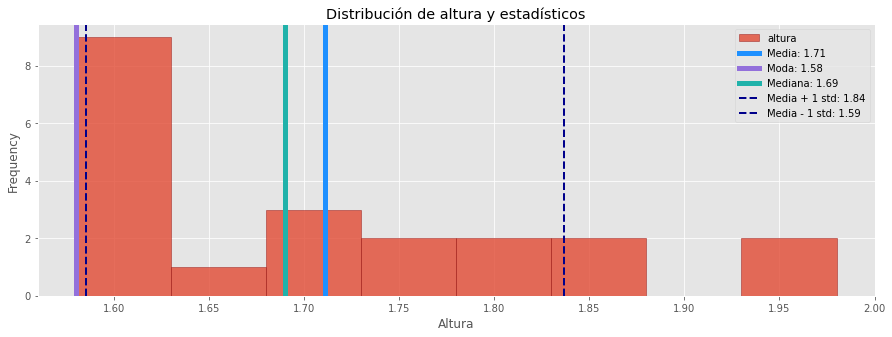

In [47]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.figure(figsize=(15,5))
df['altura'].plot(kind="hist", edgecolor="darkred", bins=8, alpha=0.8)
plt.axvline(df["altura"].mean(), color="dodgerblue", label=f"Media: {round(df['altura'].mean(), 2)}", lw=5)
plt.axvline(df["altura"].mode()[0], color="mediumpurple", label=f"Moda: {round(df['altura'].mode()[0], 2)}", lw=5)
plt.axvline(df["altura"].median(), color="lightseagreen", label=f"Mediana: {round(df['altura'].median(), 2)}", lw=5)
plt.axvline(df["altura"].mean() + df["altura"].std(), color="darkblue", label=f"Media + 1 std: {round(df['altura'].mean() + df['altura'].std(), 2)}", lw=2, ls="--")
plt.axvline(df["altura"].mean() - df["altura"].std(), color="darkblue", label=f"Media - 1 std: {round(df['altura'].mean() - df['altura'].std(), 2)}", lw=2, ls="--")
plt.title("Distribución de altura y estadísticos")
plt.xlabel("Altura")
plt.legend();